In [1]:
import pandas as pd
import numpy as np

In [2]:
# df=pd.read_csv('data_core.csv')
df=pd.read_csv('Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# df["Crop Type"].value_counts()
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [7]:
x=df.drop('label',axis=1)
y=df['label']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,dt.predict(x_test)))
print(accuracy_score(y_test,rf.predict(x_test)))

0.9931818181818182
0.9954545454545455


In [ ]:

train_acc_dt = accuracy_score(y_train, dt.predict(x_train))
test_acc_dt = accuracy_score(y_test, dt.predict(x_test))

train_acc_rf = accuracy_score(y_train, rf.predict(x_train))
test_acc_rf = accuracy_score(y_test, rf.predict(x_test))

print("\n--- Overfitting Check ---")
print(f"Decision Tree -> Train Accuracy: {train_acc_dt:.4f}, Test Accuracy: {test_acc_dt:.4f}")
print(f"Random Forest -> Train Accuracy: {train_acc_rf:.4f}, Test Accuracy: {test_acc_rf:.4f}")


def check_overfitting(train_acc, test_acc, model_name):
    gap = train_acc - test_acc
    if gap > 0.05:  
        print(f"{model_name} might be OVERFITTING (Gap: {gap:.4f})")
    else:
        print(f"{model_name} is likely fine (Gap: {gap:.4f})")

check_overfitting(train_acc_dt, test_acc_dt, "Decision Tree")
check_overfitting(train_acc_rf, test_acc_rf, "Random Forest")



--- Overfitting Check ---
Decision Tree -> Train Accuracy: 1.0000, Test Accuracy: 0.9932
Random Forest -> Train Accuracy: 1.0000, Test Accuracy: 0.9955
Decision Tree is likely fine (Gap: 0.0068)
Random Forest is likely fine (Gap: 0.0045)


In [14]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf, x, y, cv=5)
print("\nRandom Forest 5-Fold CV Accuracy:", cv_scores_rf.mean())

cv_scores_dt = cross_val_score(dt, x, y, cv=5)
print("Decision Tree 5-Fold CV Accuracy:", cv_scores_dt.mean())



Random Forest 5-Fold CV Accuracy: 0.9945454545454545
Decision Tree 5-Fold CV Accuracy: 0.9872727272727273


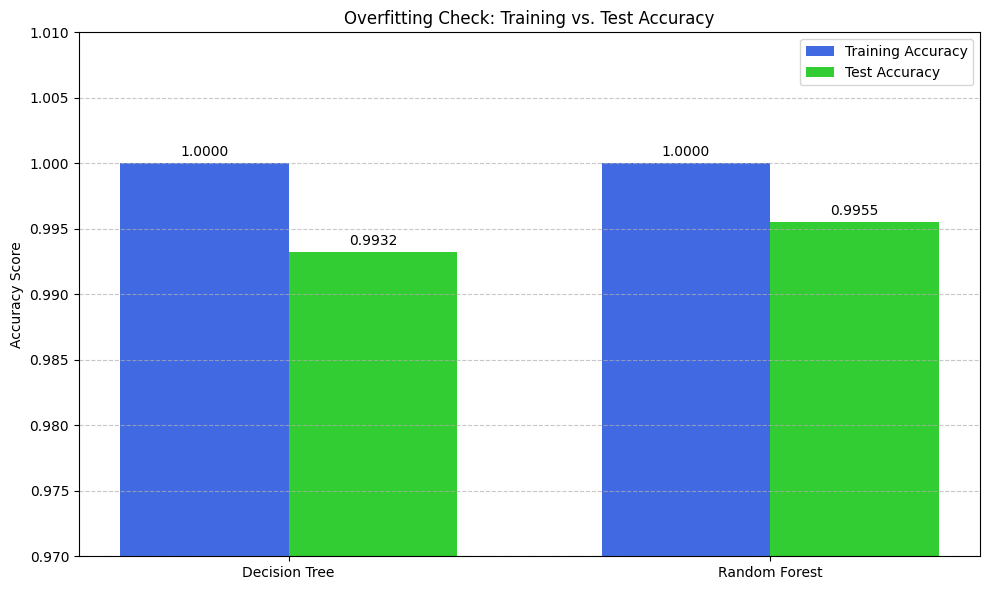

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'Random Forest']
train_accuracies = [1.00, 1.00]    
test_accuracies = [0.9932, 0.9955]   
x = np.arange(len(models))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='royalblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='limegreen')
ax.set_ylabel('Accuracy Score')
ax.set_title('Overfitting Check: Training vs. Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.set_ylim(0.97, 1.01)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')
fig.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(rf, "crop_recommendation_model.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Model and Label Encoder saved successfully!")


Model and Label Encoder saved successfully!
